In [36]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt


## Concerns housing values in suburbs of Boston.

- Number of Instances: 506
- Number of Attributes: 13 continuous attributes (including "class"
- attribute "MEDV"), 1 binary-valued attribute.
- Attribute Information:
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's
- Missing Attribute Values: None.

link - https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset

In [114]:
#import data as well as header separately

housing_data_filename = 'housing-data.csv'

#import data without header
all_data = genfromtxt(housing_data_filename, delimiter=',', skip_header=1)

all_data_with_header = np.genfromtxt(housing_data_filename, delimiter=",", skip_header=0, dtype=None)
header_names = [name.decode('UTF-8') for name in all_data_with_header[0,:]][0:]

C:\Users\osaya\AppData\Local\Temp/ipykernel_5432/1110805638.py:8: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  all_data_with_header = np.genfromtxt(housing_data_filename, delimiter=",", skip_header=0, dtype=None)


In [19]:
print(header_names)

all_data.shape

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


(511, 14)

In [35]:
#seprate data into features and labels.

label_col = all_data.shape[1]-1
X_train = all_data[:,0:label_col]
y_train = all_data[:,label_col]
X_features = header_names[0:label_col]
X_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [49]:
#count the number of NAN in numpy array
print(X_train[10, :])
np.count_nonzero(np.isnan(X_train))

[2.2489e-01 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 0.0000e+00
 9.4300e+01 6.3467e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.9252e+02
 2.0450e+01]


0

In [40]:
#Replace NAN with 0 and infinity with very large number
X_train = np.nan_to_num(X_train)

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [4.4433e-01, 0.0000e+00, 1.2500e+01, ..., 2.3000e+01, 3.4300e+02,
        2.1000e+01],
       [7.7763e-01, 0.0000e+00, 1.2700e+01, ..., 2.3000e+01, 3.4300e+02,
        7.6000e+01],
       [6.5432e-01, 0.0000e+00, 1.2800e+01, ..., 2.3000e+01, 3.2100e+02,
        4.5000e+01]])

In [70]:
#Scale/normalize the training data

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[8.896988e+01 1.000000e+02 2.728000e+01 1.000000e+00 4.860000e-01
 8.780000e+00 9.710000e+01 1.099690e+01 2.300000e+01 5.240000e+02
 1.040000e+01 3.965800e+02 7.427000e+01]
Peak to Peak range by column in Normalized X:[10.39847696  4.30809931  3.99912622  3.95898086  4.21885843  9.39931205
  3.45900916  5.24516892  2.64978082  3.1238978   4.73115759  4.36792378
  9.53428401]


In [73]:
#use Stochastic Gradient Descent Regression
sgdr = SGDRegressor(max_iter=5000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=5000)
number of iterations completed: 35, number of weight updates: 17886.0


In [75]:
#View parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [-1.37432233  1.3702474  -0.84090976  0.83479882 -2.17146034  2.59976676
 -0.93645155 -3.92580363  1.84733354 -1.9055092  -1.63806739  0.93166261
 -1.62835687], b:[22.70550133]


In [79]:
#make predictions
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[30:44]}" )
print(f"Target values \n{y_train[30:44]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[15.89225303 18.93554638 14.99199304 17.53426951 16.99802149  8.6153872
 24.50019637 24.90052571 25.4279074  32.49852956 34.38074311 28.00903004
 25.98697196 25.87739803]
Target values 
[12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6 25.3 24.7]


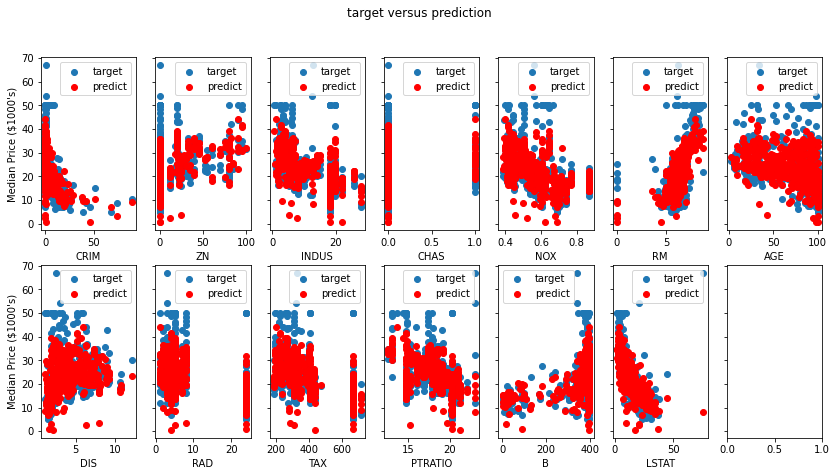

In [117]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(2,7,figsize=(14,7),sharey=True)

for i in range(X_train.shape[1]):
    row = int(i / 7)
    col = int(i % 7)
    ax[row, col].scatter(X_train[:,i],y_train, label = 'target')
    ax[row,col].set_xlabel(X_features[i])
    ax[row,col].scatter(X_train[:,i],y_pred,color='r', label = 'predict')
    ax[row,col].legend();
ax[0,0].set_ylabel("Median Price ($1000's)"); 
ax[1,0].set_ylabel("Median Price ($1000's)");
fig.suptitle("target versus prediction")
plt.show()